<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Data Visualizations

{'whiskers': [<matplotlib.lines.Line2D at 0xc0681e8>,
 'caps': [<matplotlib.lines.Line2D at 0xb812590>,
 'boxes': [<matplotlib.lines.Line2D at 0xb5b16d0>],
 'medians': [<matplotlib.lines.Line2D at 0xb816a00>],
 'fliers': [<matplotlib.lines.Line2D at 0xc013a20>],
 'means': []}

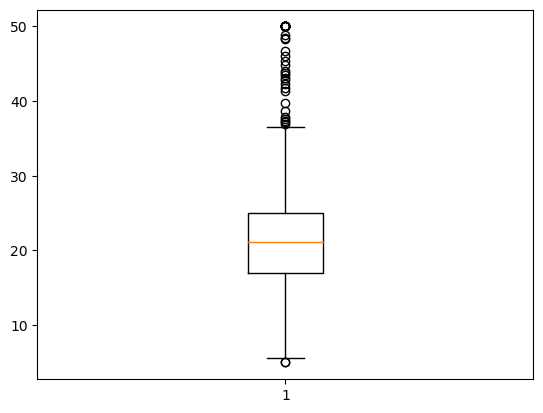

In [7]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.boxplot(boston_df["MEDV"])
#seems like the median value of a home is a little above $20,000
#there seems to be many outliers in the data that are above $40,000

<AxesSubplot:xlabel='CHAS'>

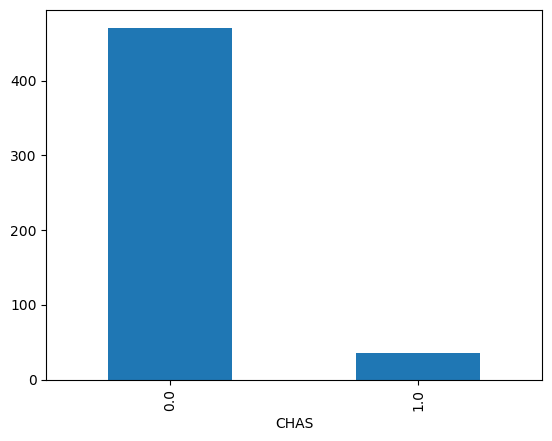

In [8]:
#Provide a  bar plot for the Charles river variable
# Count the occurrences of each value in 'chas'
chas_counts = boston_df['CHAS'].value_counts()
# Create a bar plot
chas_counts.plot(kind='bar')
#it appears that most homes are not bounded by the river

<AxesSubplot:title={'center':'MEDV'}, xlabel='age_group'>

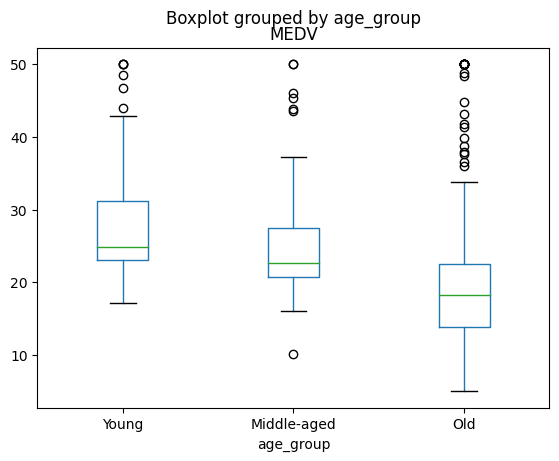

In [9]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
# Discretize the AGE variable into 3 groups
boston_df['age_group'] = pd.cut(boston_df['AGE'],
                                bins=[0, 35, 70, 100],  # Define the bins
                                labels=['Young', 'Middle-aged', 'Old'],  # Define the labels
                                right=True)
boston_df.boxplot(column='MEDV', by='age_group', grid=False)
#The value of the old age group's homes are less compared to the middle-aged group and the young group

Text(0, 0.5, 'Nitric Oxide Concentrations (NOX)')

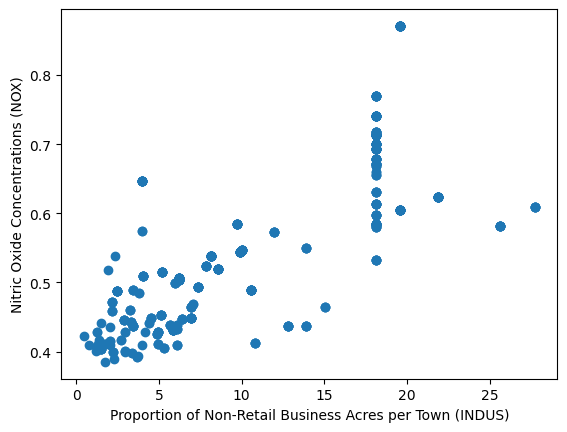

In [11]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'])
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentrations (NOX)')
#the relationship between indus and nox seems positive. In other words, the greater the non-retail business there are, the higher the nitric oxide concentration

In [ ]:
#Create a histogram for the pupil to teacher ratio variable
pyplot.hist(boston_df['PTRATIO'])
#the data doesn't seem to be normally distributed, there seems to be about 21 students per teacher.

In [15]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#H0: There is a significant difference in median value of houses bounded by the Charles river.
#Group 1: Houses bounded by the Charles River (chas = 1)
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
#Group 2: Houses not bounded by the Charles River (chas = 0)
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=False)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#H0: There will be a significant difference in MEDV for each age group
model = ols('MEDV ~ age_group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
print(anova_table)

#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H0: No, I think we can conclude that there is a correlation between nox and indus.
correlation, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']
model2 = sm.OLS(y, X).fit()
print(model2.summary())
#The impact of an additional weighted distance is an increase of 1.09 (in $1000) for the median value of a home

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
                 sum_sq     df           F         PR(>F)
Intercept  70206.173187    1.0  946.378619  1.122421e-117
age_group   5401.731883    2.0   36.407650   1.710501e-15
Residual   37314.563532  503.0         NaN            NaN
Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        16:35:49   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                           